# Intelligent Systems in Medical Imaging 2023

This Jupyter notebook is part of the course Intelligent Systems in Medical Imaging (ISMI) from Radboud University (Nijmegen, Netherlands), and it was developed by researchers of Radboud University Medical Center (Nijmegen, Netherlands).

You should have obtained this notebook by downloading it from the official Brightspace page of the course.

This notebook formulates an assignment as part of the ISMI course, and the content of this notebook should be used solely to develop a solution to this assignment. You should not make the code provided in this notebook, or your own solution, publicly available.

## Teaching Assistants

* Bram de Wilde (bram.dewilde@radboudumc.nl)
* Pierpaolo Vendittelli (pierpaolo.vendittelli@radboudumc.nl)
* Joeran Bosma (joeran.bosma@radboudumc.nl)
* Stephan Dooper (stephan.dooper@radboudumc.nl)

For questions about the assignments that go beyond the content, you can contact Bram de Wilde. Questions about the content are addressed in the tutorial sessions. You are also encouraged to use the Brightspace discussion forums to discuss content of the assignments. We will also keep an eye out there to help!

## Guidelines and instructions
Make sure you write code in any place that says "YOUR CODE HERE" by substituting `None` variables or by adding your own solution. Make sure you write in any place that says "YOUR ANSWER HERE" with your answers to the questions.

Please **do not delete or add any cells**.

Before you turn this problem in, make sure everything runs without errors. The easiest way to check this is to restart the kernel and run all cells (in the menubar, select Runtime$\rightarrow$Restart & Run All).

* Groups: You should work in **groups of 2 or 3 people**. (groups of 2 are preferred!)
* You are expected to work in Google Colab. If you run the notebooks locally, you may have to solve some issues yourself!
* Submit your **fully executed** notebook to Brightspace with file name format: `GroupN_NameSurname1_NameSurname2_NameSurname3.ipynb`
* The deadlines for all assignments are on Brightspace.
* Deadlines are soft, but make an effort to be on time. We prioritise feedback on assignments that are handed in before the deadline.
* Each assignment has 100 points, your grade is your total number of points divided by 10.
* The assignments are mandatory, but **do not count** towards your final grade for the course.
* For assignments where you have to submit to grand-challenge.org, use team name format `ismi-GroupN-nickname1`.
* When working with Google Colab, we advise you to download model checkpoints (.h5 files). This way you don't lose your checkpoint if your session times out. Also, don't forget to connect to a **GPU runtime** when training neural networks!
* In Google Colab, you can mount your Google Drive to save files, by clicking the Folder icon on the left, and then click the Mount Drive icon.

There are more detailed instructions on Brightspace on how to use Google Colab for the assignments. You can find it here: https://brightspace.ru.nl/d2l/le/content/333312/Home

## Students
Please fill in this cell with your names, e-mail address and s-numbers. This information will be used to grade your assignment.

* [Ivan Slootweg], [s1001424], [ilse.slootweg@ru.nl]
* [Elina Antonova], [s1057069], [elina.antonova@ru.nl]
* [Sven van der Post], [s1028679], [sven.vanderpost@ru.nl]

# Assignment 3 - Training a Neural Network for Classification

## Introduction 



A pulmonary nodule is a small round or oval-shaped growth in the lung. It may also be called a “spot on the lung” or a “coin lesion.” Pulmonary *nodules* are smaller than three centimeters (around 1.2 inches) in diameter. If the growth is larger than that, it is called a pulmonary *mass* and is more likely to represent a cancer than a [nodule](http://my.clevelandclinic.org/health/articles/pulmonary-nodules).

Nodules can be detected in chest CT images as objects with some kind of rounded shape (even though it is not always the case), which have an intensity that is higher (brighter) than the parenchyma tissue in the lungs.

If a nodule is detected, guidelines have to be followed to decide what is the best management for the patient.
For this purpose, the [LungRADS guidelines](https://www.acr.org/quality-safety/resources/lungrads) have been released, which describe the type of follow-up analysis based on the type and size of detected nodules.
The main categories of nodules considered in LungRADS are 5:
* solid nodule
* ground-glass nodules (also called GGN, non-solid nodules)
* semi-solid nodules (also called part-solid nodules)
* calcified nodules
* spiculated nodules



**Solid** nodules are characterized by a homogeneous texture, a well-defined shape and an intensity above -450
Housfield Units (HU) on CT. **Spiculated** nodules appear as solid lesions with characteristic spikes at the border, often considered as an indicator of malignancy. **Non-Solid** nodules (also called ground-glass opacities) have an intensity on CT lower than solid nodules (above -750 HU). **Part-Solid** nodules (also called semi-solid nodules) contain both a non-solid and a solid part, the latter normally referred to as the solid core. Compared with solid nodules, non-solid and part-solid nodules have a higher frequency of being malignant lesions. Finally, **calcified** nodules are characterized by a high intensity and a well-defined rounded shape on CT. If a nodule is completely calcified, it is a benign lesion.

The first figure below shows the table used in LungRADS, which you can also find in ```./literature/AssessmentCategories.pdf```.
As you can see, the five categories are mentioned in the table, as well as nodule size.
While nodule size is something that can be easily measured using a segmentation software, the discrimination of nodule types is not trivial. The second figure below shows examples of pulmonary nodules at different scales. For each nodule, a 2D view in the axial, coronal and sagittal view is shown.

<img src="https://github.com/ivanslootweg/ISMI/blob/main/assignment_3/figures/lungrads.png?raw=1" alt="LungRADS guidelines" align="middle" width="800">

<img src="https://github.com/ivanslootweg/ISMI/blob/main/assignment_3/figures/nodules.png?raw=1" alt="Nodules" align="middle" width="800">

In this assignment, we are going to develop a system based on machine learning to automatically classify pulmonary nodules detected in chest CT scans. For this purpose, we will use data from the publicly available [LIDC-IDRI dataset](https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI). In LIDC-IDRI, nodules have been annotated and labeled by four radiologists. Based on their annotations, we extracted a subset of nodules that will be used in this assignment for training and test purposes.

The idea of this assignment is to develop a **multi-class classification system** using machine learning, in particular using **neural networks**. The goal is to achieve the best classification accuracy on the test set, which contains 50 nodules for each class. For each nodule in both the training and test set, we provide both raw data (cubes of 40x40x40 mm containing nodules) and a pre-computed learned representation of nodules, specifically a feature vector of 256 values (more details are provided later).
The purpose of this assignment is three-fold:

1. Use the features provided to develop a system based on neural networks to classify pulmonary nodule type
2. Modify the architecture and the hyper-parameters of the neural networks and investigate how performance changes
3. Design and extract new features from raw data, and use them in your classification framework

## Data 

We will use data from the publicly available [LIDC-IDRI dataset](https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI).
From this dataset, we selected nodules to use in this assignment. In particular, we made a training set and a test set.
In both sets, five nodule types are included, namely:
* Solid
* Non-solid (ground-glass)
* Part-solid (semi-solid)
* Calcified
* Solid spiculated

**Training set** The training set *contains a distribution of nodules types that resembles what is typically found in radiology: most of the nodules are solid*. As a consequence, you will notice that the distributions of classes are skewed.

**Validation set** We don't provide a validation set. As part of the assignment, you will be asked to build a validation set yourself.

**Test set** The test set contains a *balanced* distribution of nodules, meaning that we randomly selected the same amount of nodules per class.

### Data details
We provide training and test data in two formats: (a) a **dataset** format and (b) a **raw data** format.

#### Dataset format
The first format is a typical **dataset** format, a matrix, where each row is a sample and each column is a feature. In this
dataset, we provide 256 features per nodule. At this stage you don't need to care too much about the source of these features (we will tell you more about that later), just consider that these features are somehow descriptive of pulmonary nodules.
The files in dataset format are ```training_set.npz``` and ```test_set.npz```.
In the first part of this assignment, you will be asked to train and validate neural networks using the features provided.
The training dataset contains data in the field ```['x']``` and labels in the field ```['y']```, while the test set only contains data in the field ```['x']```. The test set also contains a fiels ```['nodule_ids']```, which has unique nodule identifiers that will be used to build the file to submit to [grand-challenge.org](https://grand-challenge.org).
The nodule ID has the following format:

* ```seriesuid_worldx_worldy_worldz_diameter```

where ```seriesuid``` is the code that identifies the scan, ```worldx```, ```y``` and ```z``` indicate the position of the nodule in the scan in world coordinates, and ```diameter``` indicates the diameter of the nodule in *mm*. The position is not really important in this assignment, since we extracted the nodules from the scans for you, but in case you want to trace back these nodules, you know where you can find them in the LIDC-IDRI scans. The diameter may be useful in the last (optional) part of this assignment.

#### Raw data format
We also provide raw nodule data, because in the optional part of this assignment, you will be asked to train and validate neural networks using raw nodule data. In this part of the assignment, raw data will be available, meaning that you will have the chance of processing data as you like, directly feeding data to the neural network, or extracting additional features, etc.
Since pulmonary nodules are extracted from CT scans, raw data is 3D data.
Therefore, what we provide is a *cube* for each nodules with size 64x64x64 px, which corresponds to 40x40x40*mm* (we resampled the scans before nodule extraction).

In the training set, raw nodule data is organized in folders grouped per nodule type. We think that this may be convenient for you. Cubes are stored as ```npz``` files, and HU intensities are stored in the field ```['data']```, while the class label is stored in the field ```['label']``` for each nodule. Each file is named using the ```nodule_id```, where we also append the actual nodule label at the end of the file name.

In the test set, you will find a similar structure as for the training set, but labels are not provided and nodules are not organized in folders.

# Tasks

The tasks for this assignment are the following.


### 1. Train a basic neural network with given nodule-related features (70 points)
We have computed features of nodules that you can use for this first part of the assignment. The feature vector contains 256 features per sample, you can find them in ```LIDC-IDRI/training/training_set.npz``` and ```LIDC-IDRI/test/test_set.npz```.
* Report results using the shallow neural network architecture proposed in this first part of the assignment.

### 2. Improve the neural network by adding more layers (20 points)
For the second part of the assignment you need to improve the performance of your network. You can do this, for example, by adding extra layers, or by fine-tuning the hyper-parameters.
* Report results using neural networks, experiment with several architectures, hyper-parameters, learning rates, etc.

### 3. Train a neural network with raw nodule data (max 10 points)
For the third and optional part of the assignment you will have to deal with raw data, you can find them in the directory ```nodules``` for training and test respectively.
* Report results using neural networks, experiment with several architectures, hyper-parameters
* Design and extract your own features from the raw data provided

# Task 1: Train a neural network with given nodule-related features

In [1]:
!pip3 install -q --upgrade ismi_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.1/439.1 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# import libraries
import numpy as np
import os
import sklearn
import sklearn.neighbors
import matplotlib.pyplot as plt
import itertools
import time
import random
import torch
from torch import nn
from IPython import display
from tqdm.notebook import tqdm
import requests
import zipfile
from pathlib import Path
from ismi_utils import download_data

%matplotlib inline

### Download the dataset

In [3]:
file_name = Path("LIDC-IDRI.zip")
download_data(file_name, link='https://surfdrive.surf.nl/files/index.php/s/IglByZUcav5BTtv/download')
data_dir = Path("LIDC-IDRI")

100%|██████████| 648M/648M [01:44<00:00, 6.52MB/s]


Set the filepaths to local folders:

In [4]:
network_dir = Path('.')          # path to store neural network model/weights data

In [5]:
# labels for the five classes in this classification problem.
# These are the same names used in folders for raw training data
noduleTypes = ["Solid", "Calcified", "PartSolid", "GroundGlassOpacity", "SolidSpiculated"]
n_classes = len(noduleTypes)# len returns the number of element in a list
print(f'Classification problem with *{n_classes}* classes')

Classification problem with *5* classes


In [6]:
# convenience function
def get_file_list(path,ext='',queue=''):
    if ext != '': return [os.path.join(path,f) for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')],  [f for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')]    
    else: return [os.path.join(path,f) for f in os.listdir(path)]

### Get to know your data!
The data you have now is stored in cubes per nodule, but originally belongs <img src="https://github.com/ivanslootweg/ISMI/blob/main/assignment_3/figures/orthogonalviews.jpg?raw=1" align='right'> to a Chest CT scan. We have three orthogonal orientations: axial, coronal and sagittal orientations. Each cube is $64\times64\times64$ px (40x40x40 *mm*).

Below is a function that, given a cube containing nodule raw 3D data, returns three orthogonal 2D patches, corresponding to the *axial*, *coronal* and *sagittal* views. Use the figure on the right in this notebook as reference.

In [7]:
# convenience function that returns the axial, coronal and sagittal view given a cube (in numpy format) containing a nodule
def get_orthogonal_patches(x):
    dims = x.shape # Get shape of X
    axial = x[dims[0]//2,:,:].squeeze()
    coronal = x[:,:,dims[2]//2].squeeze()
    sagittal= x[:,dims[1]//2,:].squeeze()
    return axial, coronal, sagittal

How does the array indexing (`x[...dims[n] ...]`) in the convenience function `get_orthogonal_patches()` relate to the corresponding axial, coronal and sagittal views?

For the axial view we take the 32nd (middle) element of the 3D array, which gives us matrix with 64 by 64 elements. We do the same trick to get coronal and saggital views, but axis of the elements we take differ. So for axial we take only one middle element from the axis 0 and keep all elements from axis 1 and 2. For coronal we take only middle element on axis 2 and all elements from axis 0 and 1. And saggital view contains only one element from axis 1, but all elements from axis 0 and 2.

But because all the arrays return us 3D arrays, we use function squeeze to transform it into 2D array (matrix) for each of the views.

Now visualize some nodules in the training set in axial, coronal and sagittal orientations:

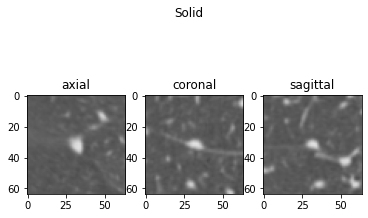

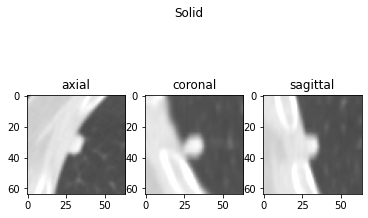

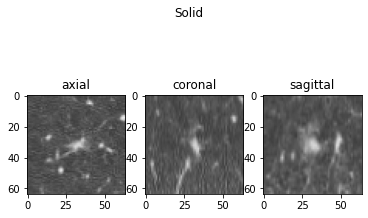

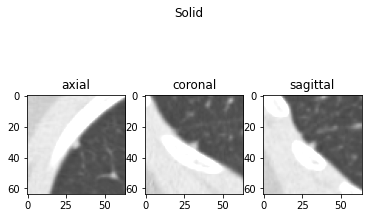

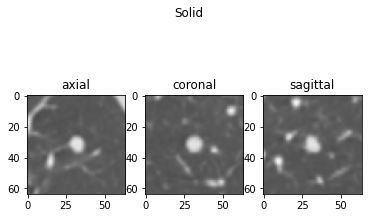

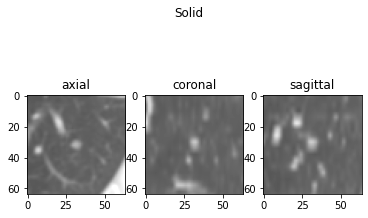

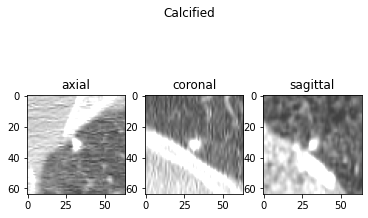

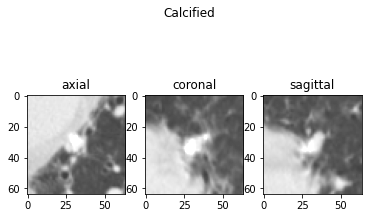

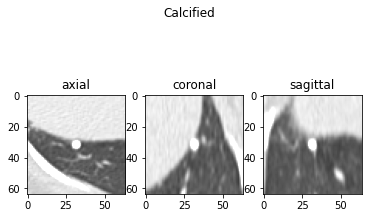

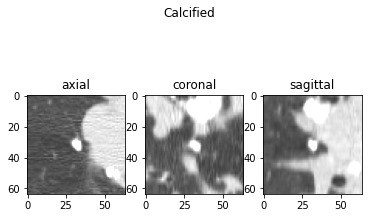

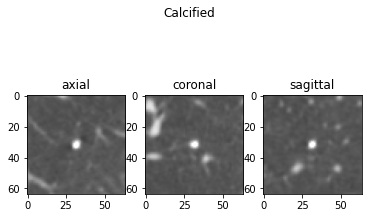

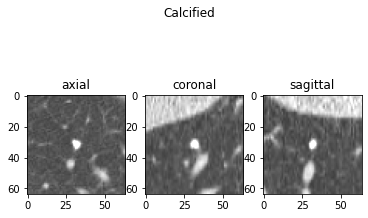

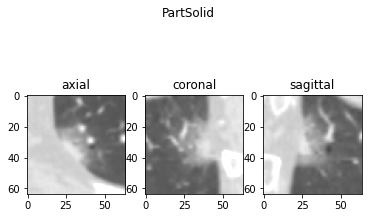

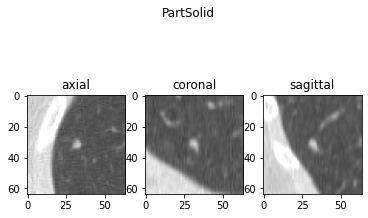

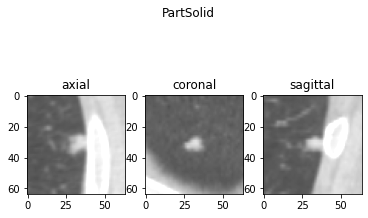

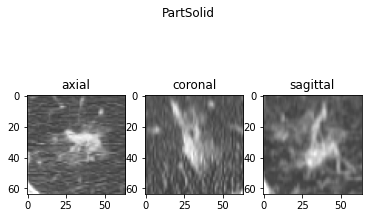

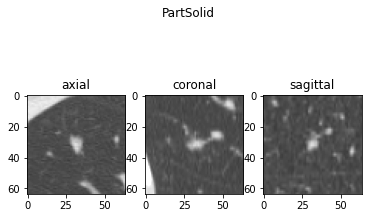

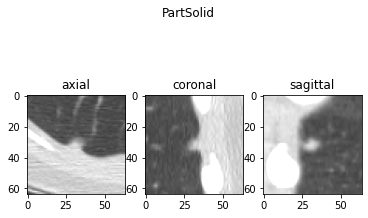

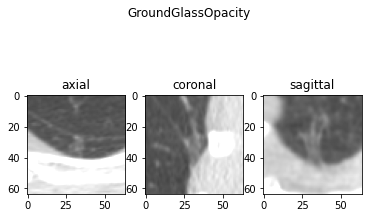

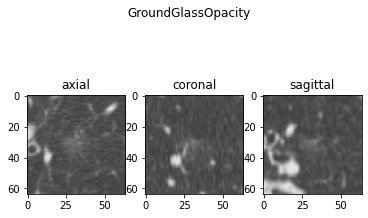

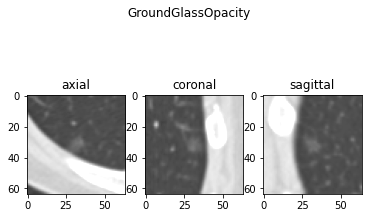

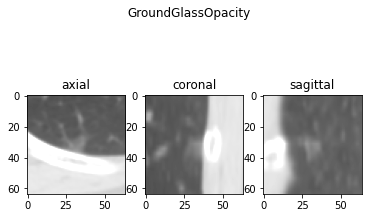

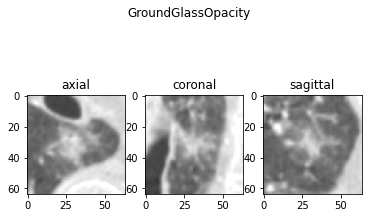

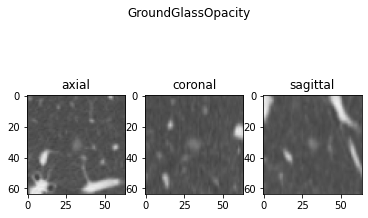

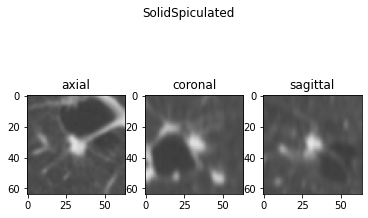

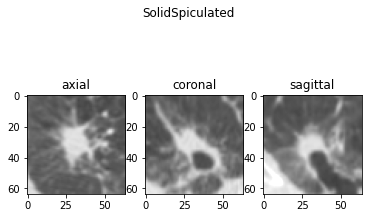

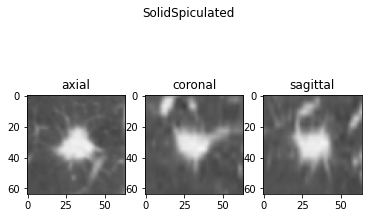

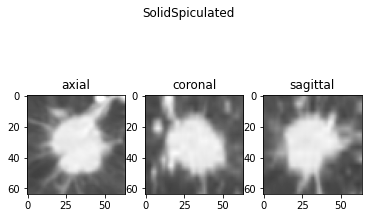

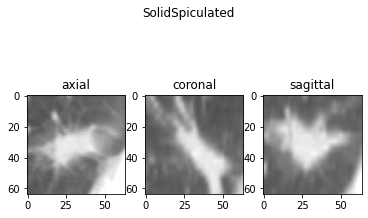

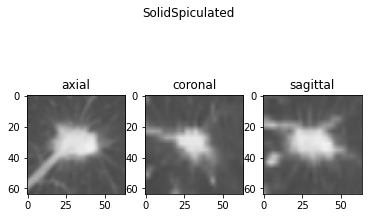

Size of our cubes (64, 64, 64)


In [8]:
src_dir = data_dir / "training" / "nodules"
for noduleType in (noduleTypes):
    nodules_dir = src_dir / noduleType
    npzs = get_file_list(nodules_dir, 'npz')
    
    for idx1, f in enumerate(range(len(npzs[0]))):
        if idx1 > 5:
            break
        file_path = npzs[0][f]
        filename = npzs[1][f]
        # axes are oriented as (z, x, y)
        npz = np.load(file_path)
        axial, coronal, sagittal = get_orthogonal_patches(npz['data'])
        plt.suptitle(noduleType)
        plt.subplot(1,3,1)
        plt.imshow(axial   , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('axial')
        plt.subplot(1,3,2)
        plt.imshow(coronal , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('coronal')
        plt.subplot(1,3,3)
        plt.imshow(sagittal, cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('sagittal')
        plt.show()
        
shape_cube = npz['data'].shape
print ('Size of our cubes',shape_cube)

The quality of patches looks better in the axial view than in the coronal and sagittal view. Bearing in mind that re-sampling took place in the x and y directions, why do you think we get this difference?

For the axial view the image displays data in the x and y directions. Therefor, the axial view displays only resampled data. The coronal and sagital views display data on the (x or y) and z axis, meaning the data is only resampled in 1 direction. The resampled data has lower quality because the spatial resolution is lower due to the resampling. 

### Load datasets
Here we are going to load the pre-computed feature vectors of 256 features per sample.

In [9]:
# load training data (given features)
npz = np.load(data_dir / 'training' / 'training_set.npz')
x = npz['x']
y = npz['y']
print (x.shape)
print (y.shape)

(1795, 256)
(1795,)


Please explain the difference in shape between the x and y arrays.

x is 2D array, where each row is new sample that has 256 features (columns). While y array contains only classes of the samples: each sample can have only one class. This way we have that data is a matrix with 1795 rows and 256 columns and labels array is just array with 1795 elements.

In [10]:
# load test data (given features)
npz = np.load(data_dir / 'test' / 'test_set.npz')
x_test = npz['x']
nodule_ids_test = npz['nodule_ids']
print(x_test.shape)

(243, 256)


Please explain the output of `print(x_test.shape)`, which prints the shape of the x (input) test data. What does the first value in () represent? The second value?

Similarly to the answer before: 243 is the number of samples (rows) and 256 is the number of features each sample has (columns), making it 243 by 256 matrix.

### Training and validation sets

The dataset we are given does not explicitly provide a validation set. Therefore, we will have to split the dataset into training and validation sets. Most modern frameworks support splitting datasets and you generally will not need to implement such functionality yourself. For instance, the [Splitter Classes](https://scikit-learn.org/stable/modules/classes.html#splitter-classes) in `scikit-learn` are excellent. However, for educational purposes, it is useful to look at how such a function may be implemented which allows for correcting for class imbalance in the dataset:

In [11]:
# one possible implementation of how to split a training set into training and validation subsets
def split_training_validation_datasets(x, y, n_classes, val_percentage=0.3, val_balanced=True):
    """
    Derive a training and a validation dataset from a given dataset with
    data (x) and labels (y). By default, the validation set is 30% of the
    training set, and it has balanced samples across classes. When balancing,
    it takes the 30% of the class with the least samples as reference.
    """
    # define number of samples
    n_samples = x.shape[0]
    
    # make array of indexes of all samples [0, ..., n_samples -1]
    idxs = np.array(range(n_samples))
    
    # initialize (empty) lists of samples that will be part of training and validation sets 
    tra_idxs = []
    val_idxs = []
    
    # append values to tra_idxs and val_idxs by adding the index of training and validation samples
    # take into account the input parameters 'val_percentage' and 'val_balanced'
    
    # find min samples per class
    if val_balanced:
        min_samples = np.inf
        for c in range(n_classes):
            n_samples_class = np.sum(y==c)
            min_samples = min(min_samples, n_samples_class)
    
    # split dataset
    for c in range(n_classes):
        c_idxs = idxs[y==c]
        n_idxs = len(c_idxs)
        if val_balanced:
            val_idxs += list(c_idxs[:int(val_percentage*min_samples)])
            tra_idxs += list(c_idxs[int(val_percentage*min_samples):])
        else:
            val_idxs += list(c_idxs[:int(val_percentage*n_idxs)])
            tra_idxs += list(c_idxs[int(val_percentage*n_idxs):])
            
    print('validation samples = {}'.format(len(val_idxs)))
    print('training samples   = {}'.format(len(tra_idxs)))
    x_train = x[tra_idxs]
    y_train = y[tra_idxs]
    x_validation = x[val_idxs]
    y_validation = y[val_idxs]
    return x_train, y_train, x_validation, y_validation 

What is class imbalance and why is it an issue for medical imaging data?

Class imbalance means that one or more of the classes are more present in the dataset than other class(es), making the majority of the data. Perfectly balanced classes should have the following per cent of data belonging to the class: **100% / x**, where x is number of classes in total. If proportion of the elements in the class(es) is not close to the balanced division, then it is called class imbalance.

Class imbalance can be an issue in classification problem due to the false results it can lead to. If majority of the images represent healthy structures, which often is the case, and only small per cent represent unhealthy structures, then often accuracy is misleadingly high for the classification, because it tends to classify all the images as "healthy". However, in medical area this can lead to overlooking the unhealthy structures and the person can be falsely considered healthy.

In [12]:
# split dataset
x_train, y_train, x_validation, y_validation = split_training_validation_datasets(x, y, n_classes)

validation samples = 90
training samples   = 1705


As in assignment 2, we normalize the training and test data to have zero mean and unit standard deviation (z-normalization). You should calculate the mean and standard deviation from the training dataset and use these values to z-normalize both the training and test datasets.

Normalize:
1. The `x_train` training data, storing the result in a new array `x_train_norm`.
2. The `x_validation` and `x_test` data, storing the result in new arrays `x_validation_norm` and `x_test_norm`.

First of all, normalize the `x_train` data, remembering to keep the values of `x_mean` and `x_std` in order to normalize the validation and test datasets with these same values:

In [13]:
x_mean = None
x_std = None
x_train_norm = None
# YOUR CODE HERE

mean = x_train.mean(axis=0) 
std = x_train.std(axis=0)
x_train_norm = (x_train - mean) / std

In [14]:
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

Now normalize the `x_validation` and `x_test` dataset, using the values of `x_mean` and `x_std` you have just calculated:

In [15]:
x_validation_norm = None
x_test_norm = None
# YOUR CODE HERE

from sklearn.preprocessing import normalize

epsilon = 0.0000001

x_valid_mean = x_validation.mean(axis=0)
x_valid_std = x_validation.std(axis=0)
x_validation_norm = (x_validation - x_valid_mean) / (x_valid_std + epsilon)
## Gives error RuntimeWarning: invalid value encountered in true_divide, because some Standard Deviation values equal to 01


x_test_mean = x_test.mean(axis=0)
x_test_std = x_test.std(axis=0)
x_test_norm = (x_test - x_test_mean) / (x_test_std + epsilon)

In [16]:
""" DO NOT MODIFY THIS CELL """

' DO NOT MODIFY THIS CELL '

**Question:** Why is it important to (z-)normalize the input data?

Mainly normalisation is done to transform the features to be on the same scale, so all the data features are treated equally, improving the performance and making trained model more stable.  Some external factors, such as scanner type, can affect voxel intensity and therefor affect feature magnitude for certain studies. 

**Shuffle your training set!** This is necessary when we want to train a neural network using stochastic (mini-batch) gradient descent.

In [17]:
indx=list(range(x_train.shape[0]))
print(y_train)
np.random.shuffle(indx)
x_train_norm = x_train_norm[indx]
y_train = y_train[indx]
print(y_train)

[0. 0. 0. ... 4. 4. 4.]
[0. 0. 0. ... 0. 0. 0.]


**Question:** Why do you think it is important to shuffle the dataset?

With shuffling the data we try to reduce the variance of it and trying to avoid the overfitting. It helps to avoid finding patterns in when the data objects of certain class were seen corresponding to their neighbours, making classes appearance more randomised. 

**Question:** Whilst most high level generic frameworks allow you to split a dataset into training and validation and will also shuffle the data for you, they typically do not take into account extra constraints specifically required by medical imaging data. One of these is class imbalance, which we have briefly seen. In generating a training and validation set for medical imaging from a given dataset, there is another important criterion for determining which data goes into the training and which into the validation set, which is related to the actual patient. 
What is it and why is it important?

In medical imaging there are often more than a single scan taken from a single patient such as multiple scans from different angles or over a time period. The images of a single patient should never be split over the training and validation set as this can lead to the model overfitting to a single patient. It is necassery to limit the images of a single patient to a single set, this also resembles reality more accurately as the model is trained on current patient data and when operational will be used on new, never seen patients.

### kNN classifier

Now that we have defined a training and a validation set, we can define a baseline result by applying kNN classifier (which we have seen in previous assignments), and compute the accuracy on the validation set. If you have made a balanced validation set, accuracy is a good evaluation metric.

In [18]:
# kNN
classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=30)
classifier.fit(x_train_norm, y_train)
y_validation_auto = classifier.predict(x_validation_norm)

Compute the confusion matrix for the results with kNN classifier. In order to compute the **confusion matrix** and the **accuracy**, you can use the following functions from the [scikit-learn library](http://scikit-learn.org/stable/documentation.html):

* ```sklearn.metrics.confusion_matrix()```
* ```sklearn.metrics.accuracy_score()```

In [19]:
# Replace None with your code

# YOUR CODE HERE

conf_mat_knn = sklearn.metrics.confusion_matrix(y_validation, y_validation_auto)
acc_knn = sklearn.metrics.accuracy_score(y_validation, y_validation_auto)


In [20]:
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

In [21]:
print(f'Accuracy using kNN: {100.0*acc_knn:.2f}%')

Accuracy using kNN: 38.89%


You can use the following convenience function to visualize the confusion matrix

In [22]:
def plot_confusion_matrix(conf_mat, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = conf_mat.max() / 2.
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, conf_mat[i, j], horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

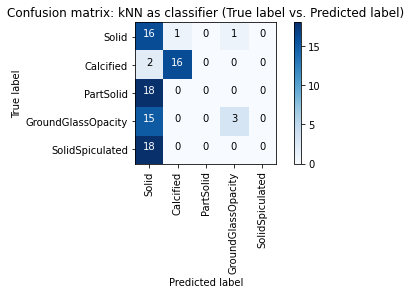

In [23]:
# visualize the confusion matrix
plot_confusion_matrix(conf_mat_knn, classes=noduleTypes,
                      title='Confusion matrix: kNN as classifier (True label vs. Predicted label)')

The confusion matrix highlights a problem of the kNN classifier as it is used now. Can you find it and explain why?

Because the Solid label is overrepresented in the dataset the cluster correlading to this label is also overrepresented. Especially the more rare cases are all assigned the Solid label. This is a classic case of underfitting.

# Classification with Neural Networks
Now that some kind of baseline result has been obtained with kNN, we can start developing a classifier based on neural networks.
For this purpose, we will use the the [**PyTorch**](https://pytorch.org/) library, which implements classes and functions that make building and training neural networks easy.

## Building a two-layer Neural Network to classify nodule features

<img src="https://github.com/ivanslootweg/ISMI/blob/main/assignment_3/figures/learning_framework.png?raw=1" alt="Learning framework" align="right" width="350">

In this first part of the assignment, we are going to build a neural network with two hidden layers in PyTorch. For this particular assignment we are going to use the fully connected layers, also called Linear layers in PyTorch (visit the following link to get more details of default parameters https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear).

As we have seen in the lecture this week, in order to build our classification framework with neural networks, we have to define and specify three main components:

1. Network architecture
2. Loss function
3. Optimization algorithm

### Creating the neural network

We will build this first network to have **two hidden layers of 15 and 8 neurons respectively**.
Later, we can experiment with a different number of neurons, hidden layers, etc., but let's start with this one.

Keep in mind that the size of the input and of the output layer of your network are given by the data and the classification problem you have to solve.
Therefore, before you start building the network, it is good to check the dimensionality of data.

In [24]:
data_size = x_train_norm.shape
n_classes = len(noduleTypes)
print(f"Data size: {data_size}")
print(f"Number of classes: {n_classes}")

Data size: (1705, 256)
Number of classes: 5


Define the architecture of a neural network with two hidden layers of 15 and 8 neurons respectively.
In your implementation, consider what follows:

* You can take inspiration from the PyTorch beginner tutorials, for example this page: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

* In PyTorch, you define a neural network as a Python class, which inherits from PyTorch's basic `nn.Module`. Classes are a feature of [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming). If you are not familiar with that, don't worry! Follow the template below in the assignment and everything should work out. Otherwise ask a TA for help!

* Use the *ReLU* activation function in between the fully connected layers. All activation functions can be found [here](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

* Use the softmax activation function for the output of the network.

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self, data_size, num_classes):
        """Simple neural network with two hidden layers
        data_size: tuple
            Defines the input data size as (num_samples, num_features)
        num_classes: int
            Defines the number of classes
        """
        super().__init__()
        self.hidden_layer_1 = None
        self.relu_1 = None

        self.hidden_layer_1 = nn.Linear(data_size[1], 15)
        self.relu_1 = nn.ReLU()

        self.hidden_layer_2 = nn.Linear(15,8)
        self.relu_2 = nn.ReLU()

        self.output_layer = nn.Linear(8, num_classes)
        self.relu_3 = nn.ReLU()
                                      

    def forward(self, x):
        out = self.hidden_layer_1(x)
        out = self.relu_1(out)

        out = self.hidden_layer_2(out)
        out = self.relu_2(out)
        
        out = self.output_layer(out)
        out = self.relu_3(out)

        pred_probab = nn.Softmax(dim=0)(out)
        # y_pred = pred_probab.argmax(0)
        
        return pred_probab

Now, you can instantiate the class that you have just coded to build your neural network:

In [26]:
# build neural network object
network=NeuralNetwork(data_size, n_classes)
print(network)

NeuralNetwork(
  (hidden_layer_1): Linear(in_features=256, out_features=15, bias=True)
  (relu_1): ReLU()
  (hidden_layer_2): Linear(in_features=15, out_features=8, bias=True)
  (relu_2): ReLU()
  (output_layer): Linear(in_features=8, out_features=5, bias=True)
  (relu_3): ReLU()
)


## Loss Function & Optimization Algorithm

Now that the architecture is defined, we have to specify the two other components of our learning framework, namely the loss function and the optimization algorithm.

### Loss
We have to define a function that, given the network, gets the predicted probability for a given input sample.
Since we are dealing with a multi-class classification problem, **categorical cross-entropy** seems a reasonable choice. Since our network already implements the final softmax layer, we use [NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss).

### Optimization algorithm
We also have to specify how we want to train our model. In our case, we will use "Stochastic Gradient Descent". As we have seen in the lecture this week, gradient descent algorithms need a **learning rate**, which indicates how much we step in the (opposite) direction of the gradient. We have also seen that strategies to adapt the learning rate during training are possible, but for the moment we just define a fixed learning rate. Pick a value and see what happens, you can optimize this later.

We set the loss function, learning rate and optimizer in the next cell.

In [128]:
loss_function = nn.NLLLoss()
learning_rate = 0.00005 # pick a value for your learning rate, we suggest 0.0001 as a starting point
sgd = optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate) # define Stochastic Gradient Descent as the optimizer, which takes the learning rate as input parameter

### Metrics
Since we are developing a classifier for a multi-class problem, accuracy is a reasonable choice.

In the next cell, define a function that evaluates the loss and the accuracy given `model`, `x` and `y`. You can use the second cell to evaluate your raw initialized model, to check if everything runs the way you expect. (What initial accuracy do you expect?)

In [118]:
from sklearn.preprocessing import OneHotEncoder
def evaluate_model(model, x, y):
    """Evaluate the loss and accuracy of a PyTorch model
    
    model: PyTorch nn.Module
    x: numpy array
        Input features (n_samples, n_features)
    y: numpy array
        Ground truth class (n_samples, 1)
    """
    # Convert numpy arrays to PyTorch tensors
    x = torch.tensor(x, dtype=torch.float)  # Model input should be `float`
    y = torch.tensor(y, dtype=torch.long)  # NLLLoss expect the target (y) to be `long`

    # Predict with the model
    # onehot = OneHotEncoder(sparse = False)
    # y_onehot = torch.tensor(onehot.fit_transform(np.array(y).reshape(len(y),1)))
    #print(type(model(x[0])))
    y_pred = torch.stack([model(x_) for x_ in x])
    
    
    # Calculate the loss
    loss_value = loss_function(y_pred,y)
    
    # Calculate accuracy
    y_pred_class = torch.argmax(y_pred,axis=1) # Should be same shape as y and contain class predictions for each sample
    accuracy = (sum(y_pred_class == y)) / len(y)
    
    return loss_value, accuracy

In [119]:
# Calculate loss and accuracy for the untrained model
loss_value, accuracy = evaluate_model(network, x_validation_norm, y_validation)
print(f"Initial validation accuracy = {accuracy}")

Initial validation accuracy = 0.36666667461395264


In [120]:
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

### Learning procedure
Now we can write the learning algorithm, as we have seen in the lecture this week.
Basically, we will iteratively update the parameters of our network by extracting mini-batches from the training set, until all the training samples have been used. After all training samples have been seen by the network once, one epoch is done. We repeat this procedure for a number of epochs that you define.
During the training loop, we also want to check the performance of the trained network on the validation set.
Therefore, for each epoch, after a training pass, we also classify the validation set.

We provide the main structure of the learning script, you must implement the missing parts:

* Train the network
* Get the training loss and accuracy
* Validate your network on the validation data
* Get the validation loss and accuracy

During training, we will also be saving to disk the parameters of the network which has the best performance on the validation set. This will be stored as the file ```best_model.pt``` in the directory ```network_dir```, which by default is the root directory of this notebook.

### Implementation

The function `train_network` is defined below, which takes the training and validation dataset and `max_epochs` as parameters. A lot of the "routine" code has been implemented already. Please replace the items marked as None with correct values. Have a look at the [PyTorch tutorials](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) to find out how to do a backpropagation and optimization step 

In [129]:
def train_network(model, x_train, y_train, x_val, y_val, max_epochs: int):
    # lists where we will be storing values during training over all epochs (for visualization purposes later)
    train_loss_list = []
    train_accuracy_list = []
    val_loss_list = []
    val_accuracy_list = []
    
    network_filepath = network_dir / 'best_model.pt'

    # we want to save the parameters that give the best performance on the validation set
    # therefore, we store the best validation accuracy, and save the parameters to disk
    best_val_accuracy = 0 # best validation accuracy

    for epoch in tqdm(range(max_epochs), position=0, leave=False, desc="Epochs"):
        # Loop over all samples in the training set
        for x, y in tqdm(zip(x_train, y_train), position=1, leave=False, desc="Samples", total=x_train.shape[0]):
            # Add batch dimension
            #x = x[None, ...]
            #y = y[None, ...]
            
            # Calculate the loss on the training sample (hint: use the evaluate_model function)
            #loss = None
            # YOUR CODE HERE         
            x = [x]
            y = [y]

            loss, _ = evaluate_model(model, x, y)
          
            # Optimization step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # Calculate training and validation metrics
        train_loss = train_accuracy = None
        val_loss = val_accuracy = None
        # YOUR CODE HERE
        train_loss, train_accuracy = evaluate_model(model, x_train, y_train)
        val_loss, val_accuracy = evaluate_model(model, x_val, y_val)
        
        # Store values for plotting
        train_loss_list.append(float(train_loss))
        train_accuracy_list.append(train_accuracy)
        val_loss_list.append(float(val_loss))
        val_accuracy_list.append(val_accuracy)
            
        # Update best validation accuracy and save the network to `network_filepath`
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = None
            # Look up how to save your network!
            # YOUR CODE HERE
            best_val_accuracy = val_accuracy
            torch.save(model, network_filepath)

            
    return train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list



In [130]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = train_network(network, x_train_norm, y_train, x_validation_norm, y_validation, max_epochs=30)

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

<ipython-input-118-f765c7954336>:13: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(y, dtype=torch.long)  # NLLLoss expect the target (y) to be `long`


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

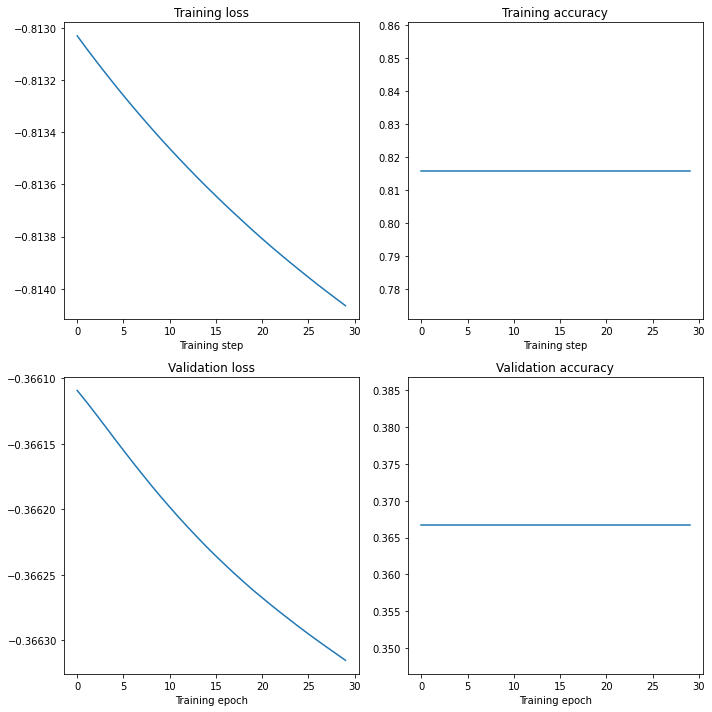

In [125]:
# Visualization of the learning curves
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.ravel()

axes[0].plot(range(len(train_loss_list)), train_loss_list)
axes[0].set_title("Training loss")
axes[0].set_xlabel("Training step")

axes[1].plot(range(len(train_accuracy_list)), train_accuracy_list)
axes[1].set_title("Training accuracy")
axes[1].set_xlabel("Training step")

axes[2].plot(range(len(val_loss_list)), val_loss_list)
axes[2].set_title("Validation loss")
axes[2].set_xlabel("Training epoch")

axes[3].plot(range(len(val_accuracy_list)), val_accuracy_list)
axes[3].set_title("Validation accuracy")
axes[3].set_xlabel("Training epoch")

plt.tight_layout()

Now call your function to train the network, finally!

Feel free to experiment with different values of `max_epochs`:
    
  * max_epochs: define max_epochs to give a reasonable number of complete training iterations but that will not take (seemingly) forever to complete: 50... 100 .. 150 ... 200 are typical ranges

### FOR FINAL VALIDATION / SUBMISSION

Please ensure you call `train_network()` with `max_epochs` set to `20` before submitting this notebook for grading.

In [97]:
_, _, _, _ = train_network(network, x_train_norm, y_train, x_validation_norm, y_validation, max_epochs=20)

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

<ipython-input-92-f765c7954336>:13: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(y, dtype=torch.long)  # NLLLoss expect the target (y) to be `long`


tensor(-0.7885, grad_fn=<NllLossBackward0>) tensor(0.8029)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7893, grad_fn=<NllLossBackward0>) tensor(0.8029)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7900, grad_fn=<NllLossBackward0>) tensor(0.8035)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7907, grad_fn=<NllLossBackward0>) tensor(0.8041)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7914, grad_fn=<NllLossBackward0>) tensor(0.8041)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7920, grad_fn=<NllLossBackward0>) tensor(0.8041)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7926, grad_fn=<NllLossBackward0>) tensor(0.8041)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7932, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7937, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7942, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7946, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7951, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7955, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7959, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7963, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7966, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7970, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7973, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7976, grad_fn=<NllLossBackward0>) tensor(0.8053)


Samples:   0%|          | 0/1705 [00:00<?, ?it/s]

tensor(-0.7979, grad_fn=<NllLossBackward0>) tensor(0.8047)


## Classification: validation set
Now we can use the trained network to classify the validation set (again), and check that the performance corresponds to the best value obtained during training. We can compute the accuracy and also visualize the confusion matrix, to get a feeling how well we are doing.

Accuracy on validation set: 0.37


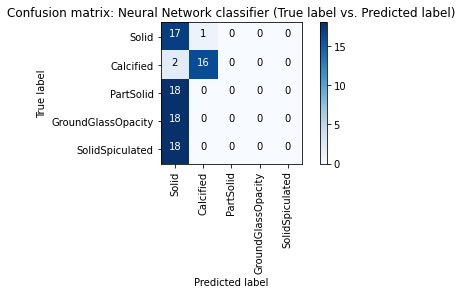

In [116]:
network_filepath = network_dir / 'best_model.pt'

# Re-load the model found for the best accuracy
# the function 'load_model' takes care of compiling again the function 
best_network = torch.load(network_filepath)
best_network.eval()

# Calculate the prediction on the validation set using the best network
y_val_pred = None
# YOUR CODE HERE
model = torch.load(network_filepath) # load the best model from training step
x = torch.tensor(x_validation_norm, dtype=torch.float)  # Model input should be `float`
y_val_pred = torch.stack([model(x_) for x_ in x]) # predict the y value for each element in x

# Assess the confusion matrix to check if the performance corresponds to the best value obtained during the training
conf_mat_nn = None
acc_nn = None
# YOUR CODE HERE

y_pred_class = torch.argmax(y_val_pred,axis=1) # assign label of class with highest probability
conf_mat_nn = sklearn.metrics.confusion_matrix(y_validation, y_pred_class) # create confusion matrix
y_validation_tensor = torch.tensor(y_validation, dtype=torch.long) # convert to tensor so we can compare labels elementwise in the next line
acc_nn = (sum(y_pred_class == y_validation_tensor)) / len(y_validation) # compute accuracy

print(f"Accuracy on validation set: {acc_nn:.2f}")
plot_confusion_matrix(conf_mat_nn, classes=noduleTypes,
                      title='Confusion matrix: Neural Network classifier (True label vs. Predicted label)')

In [ ]:
""" DO NOT MODIFY THIS CELL """

Use the labels in the validation set to identify the cases that you are misclassifying, and see what the network predicts for those cases. Since the labels in our dataset are given by humans (no ground truth available, only reference standard), there can be some confusion in the way nodules are classified, even in the reference standard.

Based on what you have learned about the appearance of nodules at the beginning of this notebook, do you think you agree with the labels predicted by your network? 

YOUR ANSWER HERE

## Classification: test set
Now we can repeat the classification step on the test set, and submit the results to grand-challenge.org. During the test procedure, we will save the predictions in a csv file, which you can submit.
Please note that the reference standard in grand-challenge has labels y = [1, ..., 5]. Take this into account when making the csv file for your submission.

In [ ]:
# Classify the test set

# Create a .csv file for saving the results of the classification
with open('results.csv', 'w') as h_csv:
    h_csv.write('nodule_id,label\n')
    
    # For each sample within the test set, get the prediction from the network and save it 
    n_test_samples = x_test_norm.shape[0]
    for idx, x in enumerate(x_test_norm):
        x = x[None, ...]
        x = torch.tensor(x, dtype=torch.float)
        
        # Get its nodule id
        nodule_id = nodule_ids_test[idx]
        
        # Make prediction using neural network
        prediction = best_network(x)
        prediction = np.argmax(prediction.detach().numpy(), axis=1)[0]

        # Write the label to file
        h_csv.write(f"{nodule_id.decode('UTF-8')},{prediction+1}\n")

## Submit your results

You can now download the `results.csv` file, using the file explorer on the left.  
Next, upload your result to the challenge website (https://ismi-nodules.grand-challenge.org/) and see how well you performed compared to your fellow students! You can submit as often as you want, only the best result counts.  

# Task 2: Improve your neural network
So far, we have implemented a simple network with two hidden layers of 15 and 8 neurons respectively, and a relu activation function.
We also used a constant learning rate.
This means that there is plenty of room for improvement!
You can, for example:
* change the architecture of your network, add neurons, add layers
* change the activation function, try e.g. sigmoid and see what happens
* change the learning rate, or try to find a strategy to adapt it during training

In order to fine-tune these parameters, you may want to expand the main script used for training and validation to include a search for the optimal set of hyper-parameters (for example, cross-validation).
For each experiment:
* provide a clear description of the setup (value, range of parameters used in the search), which we can read and understand
* save the trained network, which you can load later

In particular, show and explain:
* how the results change by changing the learning parameters/architecture of the network
* how the learning rate worked and how it affected the performance of the neural network

Note that hyper-parameters tuning has to be done using the **validation** set.
When you are happy with the performance on the vaidation set, you can submit the results to grand-challenge!

**This may sound like a boring task, but is actually what it takes to make good neural networks!!! Researchers do this very often!!!**

Do not modify previous cells in this notebook, and do not create any new cells, as this may interfere with grading. We have added plenty of cells below, so you should not run out of space.

### Step 1. Define your improved neural network

Your class may look something like the following (similar to the function you wrote earlier in the assignment to build a neural network):

```python
class ImprovedNeuralNetwork(nn.Module):
    def __init__(self, data_size, num_classes):
        super().__init__()
        self.hidden_layer_1 = ...
        ...

    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = ...
        return x
```

In [ ]:
# YOUR CODE HERE

### Step 2. Optimizer, Loss and Learning Rate

Specify the optimizer, loss and learning rate as you did earlier. At this point you may wish to try e.g. a different optimizer to the SGD optimizer used earlier.
Hint: the Adam optimizer might be an interesting choice ;)

In [ ]:
# YOUR CODE HERE

### Step 3. Train your improved network

So this is where you bring it all together: data loading and training epochs. To see how well the training works on your validation dataset, keep track of metrics such as `loss` and `accuracy` and maybe even plott the metrics so you can see how the training is progressing.

Good luck - and above all enjoy doing some exploration...

In [ ]:
# YOUR CODE HERE

# Task 3: Train a neural network with raw nodule data
Now that you have developed your supervised learning framework using the features that we provided, repeat the procedure using raw data as input. You can use the functions provided at the beginning of this notebook to extract 2D views from 3D nodules, which could be useful to develop your network.

You will have to define functions yourself that load the data from `LIDC-IDRI/{training,test}/nodules/` yourself. For the training data, you can assign the class number (0-4) using the directory names inside the `nodules` directory.

Once patches have been extracted, you can use a strategy similar to what showed in the lecture this week (when a linear model was used to classify CIFAR10 images) and vectorize patches to obtain feature vectors.

Repeat the training procedure, tune the hyper-parameters, and submit the new results.

## Loading Train Data

### Step 1. Data Loading. 

Define a function that loads and preprocesses the raw data in the cell below (copy + paste + modify from code above is not only allowed but actively encouraged :)

In [ ]:
# YOUR CODE HERE

### Step 2. Build the neural network

Define a function (or functions) that creates your neural network in the cell below (hint: copy + paste + modify the function you wrote above to create a neural network). Remember to specify the learning rate, optimizer and loss functions.

In [ ]:
# YOUR CODE HERE

### Step 3 Training

Write your own training loop (as you did above).

In [ ]:
# YOUR CODE HERE